Decision Tree Classification:
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.

We will be using  the "Titanic: Machine Learning from Disaster" dataset from Kaggle, which contains information about passengers on the Titanic, including their age, gender, ticket class, and survival status.

In [11]:
from google.colab import files

uploaded = files.upload()

Saving tested.csv to tested.csv


In [12]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['tested.csv']))
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

Checking missing values

In [13]:
print(df.isnull().sum())  # Counting missing values per column



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [15]:
#Dropping null values
df.dropna(inplace=True)
print(df.isnull().sum())  # Counting missing values per column


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Exploring dataset

In [5]:
print(df.head())
print(df.info())


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None


1) Imporitng liraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


2) Data preprocessing:
Here we drop some columns that are not relevant for the decision tree model. We map the categorical 'Sex' column to numeric values (0 for 'male' and 1 for 'female') to convert it to a numerical feature. We fill missing values in the 'Age' column with the median age.

In [17]:
df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'].fillna(df['Age'].median(), inplace=True)


In [18]:
print(df)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare
12           904         1       1    1  23.0      1      0   82.2667
14           906         1       1    1  47.0      1      0   61.1750
24           916         1       1    1  48.0      1      3  262.3750
26           918         1       1    1  22.0      0      1   61.9792
28           920         0       1    0  41.0      0      0   30.5000
..           ...       ...     ...  ...   ...    ...    ...       ...
404         1296         0       1    0  43.0      1      0   27.7208
405         1297         0       2    0  20.0      0      0   13.8625
407         1299         0       1    0  50.0      1      1  211.5000
411         1303         1       1    1  37.0      1      0   90.0000
414         1306         1       1    1  39.0      0      0  108.9000

[87 rows x 8 columns]


3) Splitting the data into features and target:
Separating the feature columns (all columns except 'Survived') into X, and the target column ('Survived') into y.

In [19]:
X = df.drop(columns=['Survived'])
y = df['Survived']


4) Splitting the data into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X refers to the input features (independent variables). y refers to the target variable (dependent variable). test_size specifies the proportion of the dataset to allocate for testing. In this case, 20% of the data will be used for testing, while the remaining 80% will be used for training. random_state sets a seed value to ensure reproducibility

5) Building the decision tree classifier:
A DecisionTreeClassifier object clf with a random seed is created for reproducibility

In [21]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#The classifier is trained on the training data using the fit() method.

DecisionTreeClassifier(random_state=42)

6) Making predictions on the test set

In [22]:
y_pred = clf.predict(X_test)


In [23]:
print(y_pred)

[0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1]


7) Evaluating the model's performance:
We calculate th accuracy and confusion matrix of the model

In [24]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 1.00
Confusion Matrix:
[[ 8  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



8) Plot the decision tree:
plot the decision tree using plot_tree() from scikit-learn's tree module

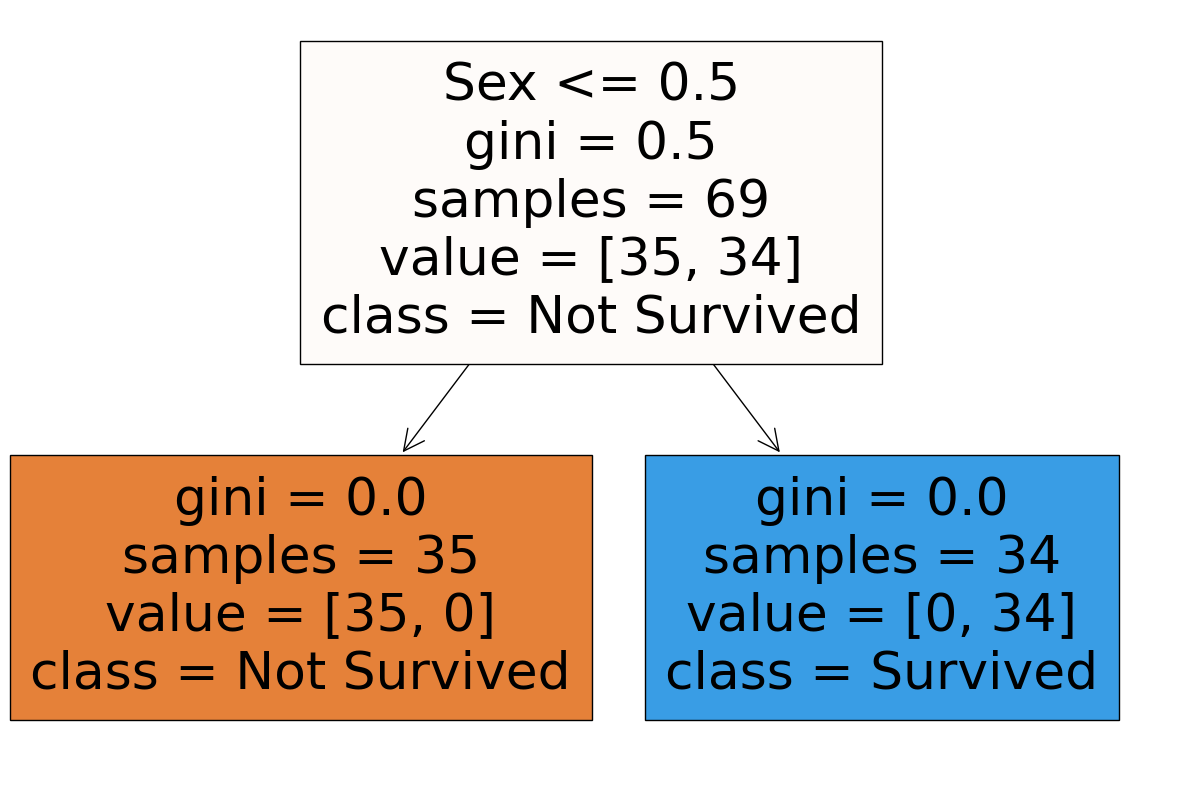

In [25]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


The feature_names parameter is used to label the features in the plot, and class_names is used to label the target classes ('Not Survived' and 'Survived'). The filled=True option colors the tree nodes based on the majority class.